<h1 style="color: #333;">Advanced Regression Assignment - House Price Prediction</h1>
     

<h3>Step 1 : Data Understanding and Exploration</h3>

In [1]:
# Importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import os

# Set display options
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading the dataset
data = pd.read_csv("train.csv", encoding='utf-8')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
data.shape

(1460, 81)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking for percentage nulls
percentage_nulls = (data.isna().mean() * 100).round(2)
percentage_nulls

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [6]:
# Checking for duplicates
no_duplicates = not data.duplicated(subset='Id', keep='first').any()
no_duplicates

True

In [7]:
# Checking for outliers in the numerical columns
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

In [8]:
# Check for any remaining missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
missing_values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<p style="font-size: 16px; color: #555;">The presence of null values in these specific columns suggests the absence of certain facilities that could potentially impact the property's price. Therefore, our initial step will involve imputing these categorical variables with the value 'None'.</p>

<h3>Step 2: Data Cleaning</h3>


In [9]:
# Addressing Missing Values

# For the 'Alley' column, 'NA' indicates 'No Alley,' so we'll replace 'NA' with this value.
data['Alley'].fillna('No Alley', inplace=True)

# For the 'MasVnrType' column, 'NA' can be interpreted as 'None,' so we'll replace 'NA' with 'None.'
data['MasVnrType'].fillna('None', inplace=True)

# In the 'FireplaceQu' column, 'NA' implies 'No Fireplace,' so we'll replace 'NA' with this value.
data['FireplaceQu'].fillna('No Fireplace', inplace=True)

# For the 'PoolQC' column, 'NA' signifies 'No Pool,' so we'll replace 'NA' with this value.
data['PoolQC'].fillna('No Pool', inplace=True)

# In the 'Fence' column, 'NA' indicates 'No Fence,' so we'll replace 'NA' with this value.
data['Fence'].fillna('No Fence', inplace=True)

# 'MasVnrArea' and 'LotFrontage' can be treated as 0 (zero) for 'NA.'
data['MasVnrArea'].fillna(0, inplace=True)
data['LotFrontage'].fillna(0, inplace=True)

# Regarding the 'GarageType,' 'GarageFinish,' 'GarageQual,' and 'GarageCond' columns, 'NA' means 'No Garage,' so we'll replace 'NA' with this value.
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)

# As the 'MiscFeature' column has almost 99% null values, we'll drop it from the dataset.
data = data.drop('MiscFeature', axis=1)

In [10]:
# Check for any remaining missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [11]:
data.shape

(1460, 80)

In [12]:
# Remove rows with any null values
data.dropna(how='any', inplace=True)

In [13]:
data.shape

(1346, 80)

In [14]:
# Convert Year Columns to Number of Years

# Calculate the number of years since construction for 'YearBuilt'
data['YearBuilt'] = 2019 - data['YearBuilt']

# Calculate the number of years since remodeling for 'YearRemodAdd'
data['YearRemodAdd'] = 2019 - data['YearRemodAdd']

# Calculate the number of years since garage construction for 'GarageYrBlt'
data['GarageYrBlt'] = 2019 - data['GarageYrBlt']

# Calculate the number of years since the year of sale for 'YrSold'
data['YrSold'] = 2019 - data['YrSold']

# Display the DataFrame with updated year columns
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,16.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,11,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,43.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,12,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,18.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,11,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,21.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,13,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,19.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,11,WD,Normal,250000


In [15]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,16,16,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,16.0,2,548,0,61,0,0,0,0,0,2,11,208500
1,2,20,80.0,9600,6,8,43,43,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,43.0,2,460,298,0,0,0,0,0,0,5,12,181500
2,3,60,68.0,11250,7,5,18,17,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,18.0,2,608,0,42,0,0,0,0,0,9,11,223500
3,4,70,60.0,9550,7,5,104,49,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,21.0,3,642,0,35,272,0,0,0,0,2,13,140000
4,5,60,84.0,14260,8,5,19,19,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,19.0,3,836,192,84,0,0,0,0,0,12,11,250000


<h2>Dropping Columns to Treat as Categorical Variables</h2>
    <p>
        To treat certain columns as categorical variables, we will drop them from the 'house_numeric' DataFrame. These columns include:
    </p>
    <ul>
        <li>'MSSubClass'</li>
        <li>'OverallQual'</li>
        <li>'OverallCond'</li>
        <li>'YearBuilt'</li>
        <li>'YearRemodAdd'</li>
        <li>'BsmtFullBath'</li>
        <li>'BsmtHalfBath'</li>
        <li>'FullBath'</li>
        <li>'HalfBath'</li>
        <li>'BedroomAbvGr'</li>
        <li>'KitchenAbvGr'</li>
        <li>'TotRmsAbvGrd'</li>
        <li>'Fireplaces'</li>
        <li>'GarageYrBlt'</li>
        <li>'GarageCars'</li>
        <li>'MoSold'</li>
        <li>'YrSold'</li>
    </ul>

In [16]:
# Drop the specified columns from the 'data' DataFrame
numeric_data = numeric_data.drop(['Id'], axis=1)

numeric_data = numeric_data.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                    'MoSold', 'YrSold'], axis=1)

# Display the first few rows of the modified DataFrame
numeric_data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


<p style="font-weight: bold; font-size: 18px;">Exploring Variable Correlations</p>


In [17]:
# Exploring Variable Correlations

# Calculate the Correlation Matrix
correlation_matrix = numeric_data.corr()

# Display the Correlation Matrix
correlation_matrix

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.096318,0.106286,0.079731,-0.013521,0.154041,0.251374,0.245202,0.038347,0.024834,0.217348,0.230943,-0.021104,0.074005,0.026507,0.023384,0.021876,0.116601,-0.062376,0.213434
LotArea,0.096318,1.000000,0.095913,0.211159,0.109989,-0.012887,0.269729,0.292176,0.045751,0.009618,0.257477,0.168111,0.166315,0.083224,-0.012986,0.019182,0.038155,0.076837,0.040670,0.253854
MasVnrArea,0.106286,0.095913,1.000000,0.249453,-0.082148,0.104170,0.361346,0.336093,0.169002,-0.061273,0.389039,0.365099,0.149660,0.125485,-0.111927,0.015623,0.053407,0.009578,-0.028645,0.460847
BsmtFinSF1,0.079731,0.211159,0.249453,1.000000,-0.065627,-0.551717,0.507038,0.452920,-0.153321,-0.052053,0.204102,0.285586,0.186149,0.111717,-0.102091,0.026257,0.050630,0.141806,0.007526,0.362246
BsmtFinSF2,-0.013521,0.109989,-0.082148,-0.065627,1.000000,-0.232875,0.081691,0.092315,-0.108858,0.007252,-0.022696,-0.053910,0.061539,0.002902,0.045387,-0.031257,0.086320,0.041263,0.006393,-0.032170
BsmtUnfSF,0.154041,-0.012887,0.104170,-0.551717,-0.232875,1.000000,0.363344,0.317775,-0.017812,-0.002400,0.221838,0.194513,-0.021792,0.120759,-0.002129,0.023616,-0.023062,-0.039233,-0.018538,0.190390
TotalBsmtSF,0.251374,0.269729,0.361346,0.507038,0.081691,0.363344,1.000000,0.893812,-0.237083,-0.058507,0.461662,0.511508,0.212043,0.258226,-0.099246,0.042504,0.067513,0.134744,-0.008944,0.602612
1stFlrSF,0.245202,0.292176,0.336093,0.452920,0.092315,0.317775,0.893812,1.000000,-0.223865,-0.020085,0.555078,0.498648,0.229734,0.227346,-0.048229,0.052354,0.081434,0.133656,-0.014424,0.603505
2ndFlrSF,0.038347,0.045751,0.169002,-0.153321,-0.108858,-0.017812,-0.237083,-0.223865,1.000000,0.044358,0.682860,0.122796,0.082647,0.200071,0.057273,-0.024701,0.035543,0.082479,0.013711,0.307796
LowQualFinSF,0.024834,0.009618,-0.061273,-0.052053,0.007252,-0.002400,-0.058507,-0.020085,0.044358,1.000000,0.100565,0.013766,-0.008542,0.017760,0.049865,0.000014,0.045000,0.080465,-0.000126,-0.010330


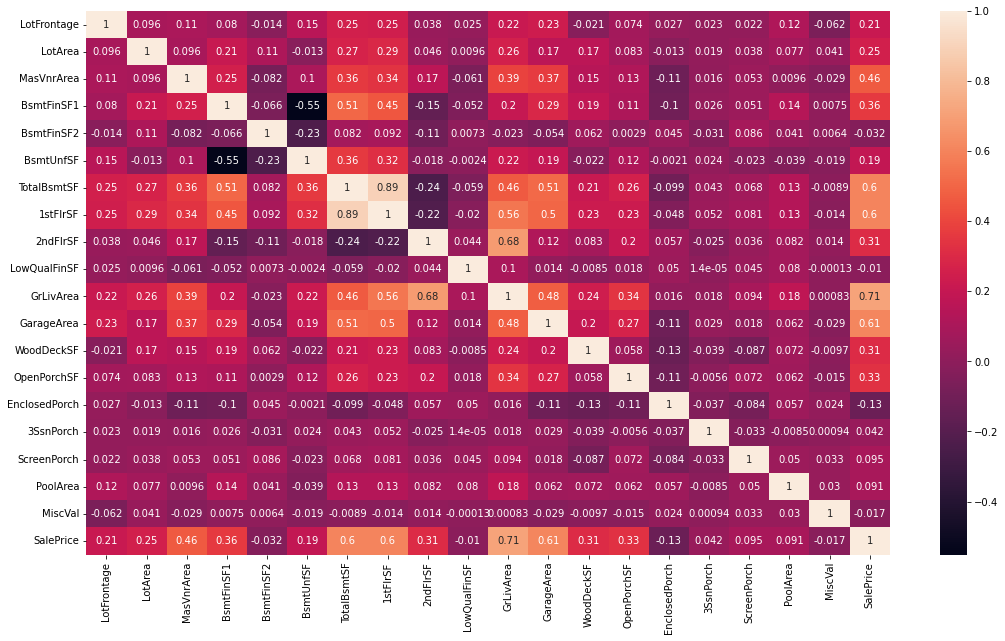

In [18]:
# Set the figure size
plt.figure(figsize=(18, 10))

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True)

# Display the heatmap
plt.show()

<h4>We've observed correlations among certain variables. Before deciding to drop these columns, it's essential to assess their predictive power.</h4>

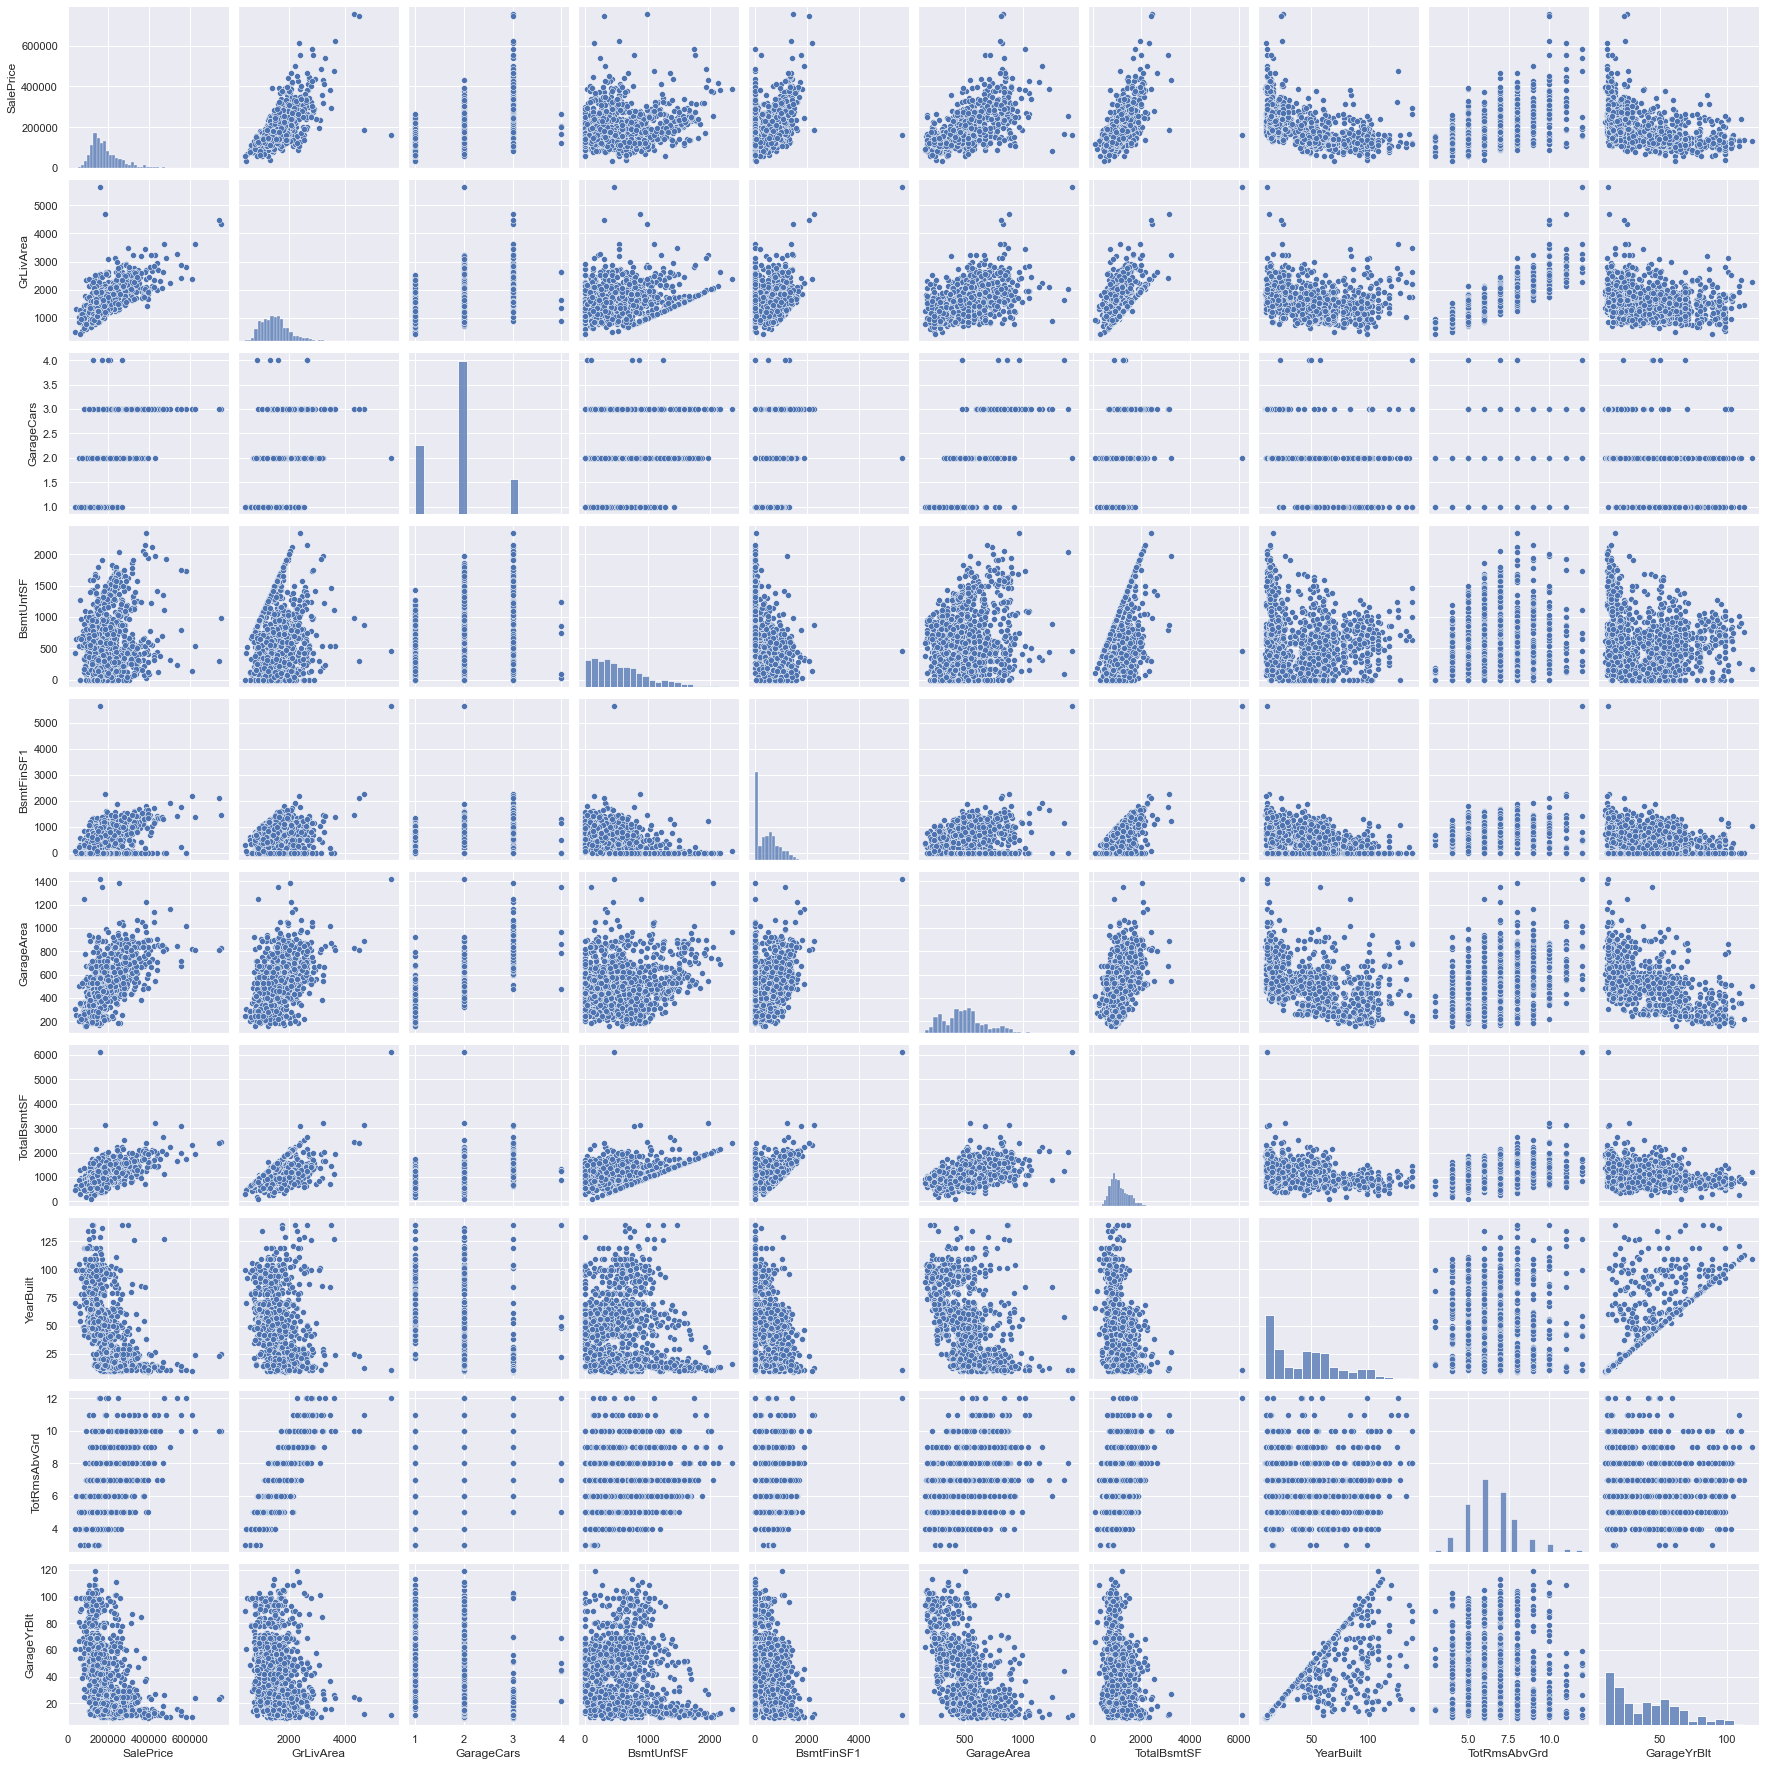

In [19]:
# Set the style for plotting
sns.set()

# Define the columns of interest
cols_of_interest = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']

# Create a pairplot to visualize relationships
sns.pairplot(data[cols_of_interest], size=2.5)

# Display the pairplot
plt.show()

In [20]:
data.drop([ 'Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,16.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,11,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,43.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,12,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,18.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,11,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,21.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,13,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,19.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,11,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,20,19,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,20.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Pool,No Fence,0,8,12,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,41,31,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,41.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,No Pool,MnPrv,0,2,9,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,78,13,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,78.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,No Pool,GdPrv,2500,5,9,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,69,23,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,

<p style="font-weight: bold; font-size: 18px;">Eliminate Correlated Columns with Limited Impact on 'SalePrice'</p>
<p style="font-size: 16px;">In an effort to streamline the dataset and improve the predictive power for 'SalePrice,' we have identified and removed certain columns with correlations that do not significantly contribute to the target variable.</p>


In [21]:
# List of columns to drop
columns_to_drop = ['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt']

# Drop the specified columns
data.drop(columns_to_drop, axis=1, inplace=True)

# Display the updated DataFrame
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,No Fireplace,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,11,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,43,43,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,12,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,18,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,11,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,104,49,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,13,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,19,19,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,11,WD,Normal,250000


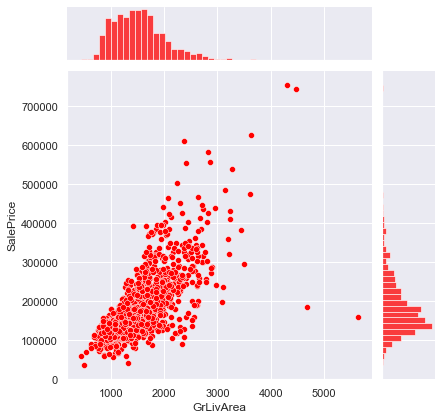

In [22]:
# Plotting GrLivArea vs SalePrice with a red color
sns.jointplot(x=data['GrLivArea'], y=data['SalePrice'], color='red')
plt.show()

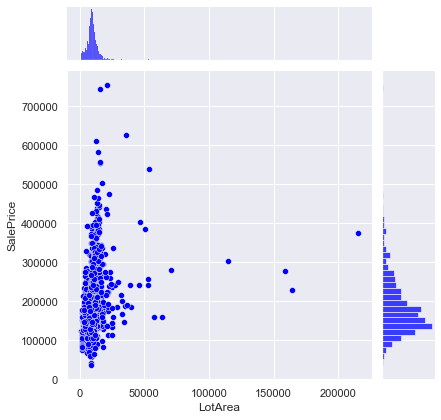

In [23]:
# Plotting LotArea vs SalePrice with a blue color
sns.jointplot(x=data['LotArea'], y=data['SalePrice'], color='blue')
plt.show()



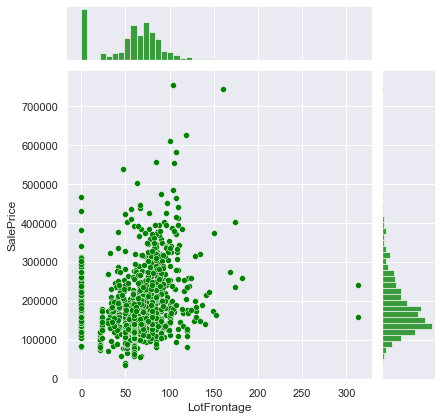

In [24]:

# Plotting LotFrontage vs SalePrice with a green color
sns.jointplot(x=data['LotFrontage'], y=data['SalePrice'], color='green')
plt.show()


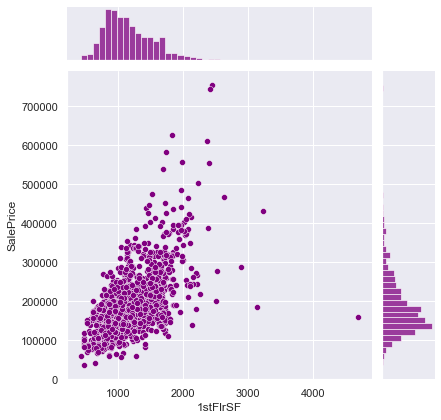

In [25]:


# Plotting 1stFlrSF vs SalePrice with a purple color
sns.jointplot(x=data['1stFlrSF'], y=data['SalePrice'], color='purple')
plt.show()

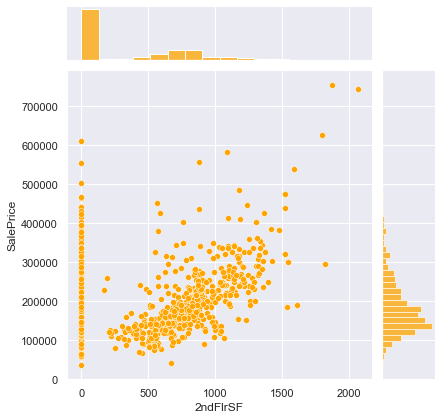

In [26]:
# Plotting 2ndFlrSF vs SalePrice with an orange color
sns.jointplot(x=data['2ndFlrSF'], y=data['SalePrice'], color='orange')
plt.show()

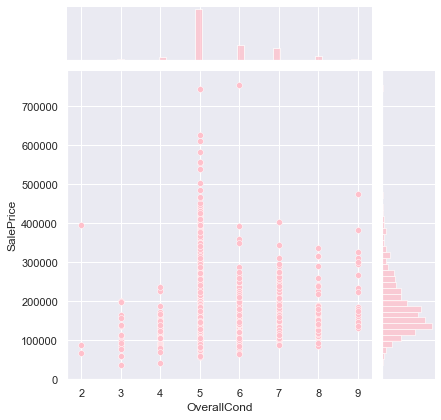

In [27]:
# Plotting OverallCond vs SalePrice with a pink color
sns.jointplot(x=data['OverallCond'], y=data['SalePrice'], color='pink')
plt.show()

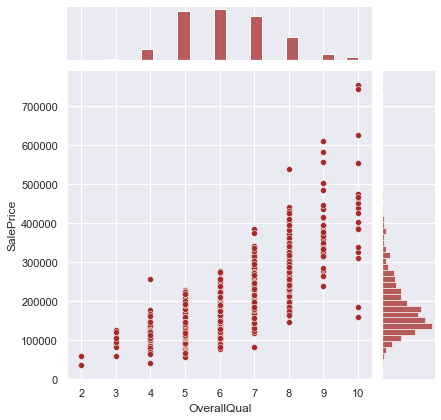

In [28]:
# Plotting OverallQual vs SalePrice with a brown color
sns.jointplot(x=data['OverallQual'], y=data['SalePrice'], color='brown')
plt.show()

In [29]:
data.shape

(1346, 76)

<h3>To check the variance (or spread) of numeric columns in a DataFrame, we can calculate the standard deviation. A higher standard deviation indicates greater variance in the data.</h3>

In [34]:
# Calculate the standard deviation for each numeric column
std_deviation = data.select_dtypes(include=['float64', 'int64']).std()

# Print the standard deviation for each column
print(std_deviation)

Id                 421.422088
MSSubClass          41.214069
LotFrontage         35.203997
LotArea          10325.702028
OverallQual          1.326129
OverallCond          1.078025
YearBuilt           29.567218
YearRemodAdd        20.286616
MasVnrArea         185.246478
BsmtFinSF1         459.482069
BsmtFinSF2         165.744795
TotalBsmtSF        406.285302
1stFlrSF           388.275421
2ndFlrSF           440.470609
LowQualFinSF        40.592955
GrLivArea          520.384843
BsmtFullBath         0.515734
BsmtHalfBath         0.241010
FullBath             0.548271
HalfBath             0.504358
BedroomAbvGr         0.778006
KitchenAbvGr         0.176187
Fireplaces           0.646687
GarageArea         186.490168
WoodDeckSF         127.473653
OpenPorchSF         65.587820
EnclosedPorch       60.877529
3SsnPorch           30.135862
ScreenPorch         57.892482
PoolArea            41.836999
MiscVal            506.553810
MoSold               2.703737
YrSold               1.329782
SalePrice 

In [35]:
# Only selecting columns which don't have Low Variance

selected_columns = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
    'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
    'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF',
    'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
    'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual',
    'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'SaleType', 'SaleCondition', 'SalePrice'
]

# Select the specified columns in the DataFrame
data = data[selected_columns]


In [36]:
data.shape

(1346, 60)

In [37]:
# Create dummy variables
data = pd.get_dummies(data, drop_first=True )

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,208500,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,181500,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,223500,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,140000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,250000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


<h3>Step 3: Data Preparation</h3>

In [38]:
X = data.drop(['SalePrice'], axis=1)

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
y = data['SalePrice']

y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

# Fit and transform the scaler on the training data
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the testing data using the same scaler
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


<h3>Step 4: Model Building and Evaluation</h3>

In [43]:
# Importing the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Create an instance of LinearRegression
lm = LinearRegression()

In [44]:
# Fit the Linear Regression model to the training data
lm.fit(X_train, y_train)

# Create an RFE model with the top 100 variables
rfe = RFE(lm, 100)

# Fit the RFE model to the training data
rfe = rfe.fit(X_train, y_train)

# Check the ranks of the variables
# This will list the columns along with their support (selected or not) and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 65),
 ('LotArea', False, 37),
 ('OverallQual', True, 1),
 ('OverallCond', False, 23),
 ('MasVnrArea', False, 41),
 ('BsmtFinSF1', False, 87),
 ('BsmtFinSF2', False, 92),
 ('TotalBsmtSF', False, 35),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 51),
 ('BsmtHalfBath', False, 77),
 ('FullBath', False, 43),
 ('HalfBath', False, 49),
 ('BedroomAbvGr', False, 69),
 ('KitchenAbvGr', False, 27),
 ('Fireplaces', False, 91),
 ('GarageArea', False, 32),
 ('WoodDeckSF', False, 57),
 ('OpenPorchSF', False, 86),
 ('EnclosedPorch', False, 93),
 ('3SsnPorch', False, 72),
 ('ScreenPorch', False, 40),
 ('PoolArea', False, 56),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', True, 1),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 63),
 ('LandContour_HLS', True, 1),
 ('LandContour_Low', True, 

In [45]:
#Choose the top 100 variables
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['MSSubClass', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LandSlope_Sev',
       'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'BldgType_2fmCon', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_SFoyer', 'HouseStyle_

In [46]:
X_train_rfe = X_train[selected_columns]
X_train_rfe.head()

,MSSubClass,OverallQual,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,BldgType_2fmCon,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Po,BsmtExposure_Gd,BsmtFinType1_LwQ,BsmtFinType1_Unf,BsmtFinType2_BLQ,HeatingQC_Po,CentralAir_Y,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,PavedDrive_P,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal
1359,-0.840754,2.102540,1.998623,-0.774469,-0.083633,0.852636,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
284,1.605170,-0.167914,0.971102,-0.774469,-0.083633,0.077603,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
726,-0.840754,-0.167914,1.237496,-0.774469,-0.083633,0.278538,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
742,-0.840754,0.588904,0.397720,-0.774469,-0.083633,-0.354885,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
730,1.605170,1.345722,1.075123,-0.774469,-0.083633,0.156063,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [47]:
X_train_rfe.shape

(942, 100)

In [50]:
#Make Predictions
y_train_predictions = lm.predict(X_train_rfe)
r2_score = metrics.r2_score(y_true=y_train, y_pred=y_train_predictions)
r2_score

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 194 is different from 100)


<h3>Step 5: Observations and Inferences</h3>